In [6]:
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git
#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import pandas as pd
import seaborn as sns
#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline
#Modification

In [26]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

In [16]:
def train_test_data(noise, kind):
    '''
    get train and test datasets
    inputs: 
    noise(float): 0-1 noise
    kind(string): can be "random","andSplit","xorSplit","targetSplit","multiBlobs"
    '''
    
    if kind == "random":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
    elif kind == "andSplit":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
    elif kind == "xorSplit":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))
    elif kind == "targetSplit":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
    else:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))
    return dfTrain, dfTest


clfs = {'RF': sklearn.ensemble.RandomForestClassifier(),
        'LR': sklearn.linear_model.LogisticRegression(),
        'SVM_l': sklearn.svm.SVC(kernel = 'linear', probability = True),
        'SVM_p': sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
        'GB': sklearn.ensemble.GradientBoostingClassifier(),
        'NB': sklearn.naive_bayes.GaussianNB(),
        'DT': sklearn.tree.DecisionTreeClassifier(),
        #'SGD': SGDClassifier(loss="hinge", penalty="l2"),
        'KNN': sklearn.neighbors.KNeighborsClassifier(n_neighbors=3),
        'NN': sklearn.neural_network.MLPClassifier(),
        'BAG': sklearn.ensemble.BaggingClassifier(sklearn.tree.DecisionTreeClassifier(), max_samples= 0.5, n_estimators = 20) ,
        'AB': sklearn.ensemble.AdaBoostClassifier(sklearn.tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
            }

# real_data = {'reddit': lucem_illud_2020.loadReddit(),
#             'news': lucem_illud_2020.loadNewsGroups(),
#             'senate_s': lucem_illud_2020.loadSenateSmall(),
#             'senate_l': lucem_illud_2020.loadSenateLarge(),
#             'spam':lucem_illud_2020.loadSpam()}



def classify(models_to_run, clfs, dfTrain, dfTest,label,feature_lst):
    results_df =  pd.DataFrame()
    for index,clf in clfs.items():
        if index in models_to_run:
            clf.fit(np.stack(dfTrain[feature_lst], axis=0), dfTrain[label])
            eval_df = lucem_illud_2020.evaluateClassifier(clf, dfTest)
            eval_df['model_type'] = "{}".format(index)
            eval_df['noise'] = noise
            results_df = results_df.append(eval_df)
    return results_df

def classify_dbs(models_to_run, clfs, dfTrain, dfTest,label,feature_lst):
    results_df =  pd.DataFrame()
    for index,clf in clfs.items():
        if index in models_to_run:
            clf.fit(np.stack(dfTrain[feature_lst], axis=0), dfTrain[label])
            eval_df = lucem_illud_2020.evaluateClassifier(clf, dfTest)
            eval_df['model_type'] = "{}".format(index)
            results_df = results_df.append(eval_df)
    return results_df

In [9]:
real_data['reddit']

,Unnamed: 0,author,over_18,score,subreddit,text,title,url,category,tokenized_text,normalized_text,vect
0,0,guitarsdontdance,False,14089,Tales From Tech Support,So my story starts on what was a normal day ta...,"""Don't bother sending a tech, I'll be dead by ...",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[So, my, story, starts, on, what, was, a, norm...","[story, start, normal, day, take, call, line, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,SECGaz,False,13724,Tales From Tech Support,"> $Me - Hello, IT. > $Usr - Hi, I am still ...","Hi, I am still off sick but I am not.",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[>, $, Me, Hello, IT, >, $, Usr, Hi, I, am, st...","[>, $, hello, >, $, usr, hi, sick, >, $, oh, m...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,Clickity_clickity,False,13404,Tales From Tech Support,[Part 1](http://www.reddit.com/r/talesfromtech...,"Jack, the Worst End User, Part 4",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[Part, 1](http://www.reddit.com, r, talesfromt...","[1](http://www.reddit.com, r, talesfromtechsup...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,TheDroolinFool,False,13152,Tales From Tech Support,Another tale from the out of hours IT desk... ...,"""I need you to fix Google Bing immediately!""",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[Another, tale, from, the, out, of, hours, IT,...","[tale, hour, desk, service, desk, caller, goog...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,goldie-gold,False,12650,Tales From Tech Support,"This just happened... So, I had a laptop syst...",Engineer is doing drugs!! No. No they aren't.,https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[This, just, happened, So, I, had, a, laptop, ...","[happen, laptop, system, board, fail, warranty...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,5,Raitaro,False,12372,Tales From Tech Support,I work Helpdesk for a retail store chain in th...,I'm pretty sure I knocked a user out from near...,https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[I, work, Helpdesk, for, a, retail, store, cha...","[work, helpdesk, retail, store, chain, uk, sto...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,6,sfsdfd,False,11295,Tales From Tech Support,I witnessed this astounding IT meltdown around...,"Company-wide email + 30,000 employees + auto-r...",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[I, witnessed, this, astounding, IT, meltdown,...","[witness, astounding, meltdown, large, academi...","[0.0, 0.06435071394184011, 0.0, 0.0, 0.0, 0.0,..."
7,7,Bombadils,False,10528,Tales From Tech Support,First post in quite some time! I work at a loc...,"OK, now the password is 'D35p41r'",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[First, post, in, quite, some, time, I, work, ...","[post, time, work, local, authority, helldesk,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,8,brenkelieshere,False,9448,Tales From Tech Support,"Last year, Help Desk got a call from a user co...",How to fix a laptop that won't boot in under a...,https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[Last, year, Help, Desk, got, a, call, from, a...","[year, help, desk, get, user, complain, laptop...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,9,CopperD,False,9359,Tales From Tech Support,"A call comes in, a user reports her keyboard i...",nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn,https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[A, call, comes, in, a, user, reports, her, ke...","[come, user, report, keyboard, go, erratic, po...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Exercise 1
10 artificial datasets were created by changing the noises (0.2 and 0.8) and changing the data patterns(which can be found in the list called kinds). We make the variations between them and check how they behave. Finally, we have a dataframe with most of the evaluation metrics we need.

In [18]:
noises = [.2,.8]

kinds = ["random","andSplit","xorSplit","targetSplit","multiBlobs"]


models_to_run = ['RF','LR','SVM_l','SVM_p','GB',
                'NB','DT','NN']

df_total = pd.DataFrame()
for  noise in noises:
    for kind in kinds:
        dfTrain, dfTest = train_test_data(noise,kind)
        df_result = classify(models_to_run,clfs,dfTrain,dfTest,"category", "vect")
        df_result['pattern'] = kind
        df_total = df_total.append(df_result)

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


For the following analyses, we will focus on AUC. 
We see that with random patterns, the best achievable precision is with Random Forests or Neural Networks, at a nose if 0.2
With xorSplit patterns, we see that less noise guarantees a better AUC. Also, Neural Networks is the maximum winner in this scenario.

In [35]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total[df_total['pattern'] == 'random'].reset_index().style.background_gradient(cmap=cm)
s

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,noise,pattern
0,0,0.485,0.515,0.512,0.50768,0.64,RF,0.2,random
1,1,0.485,0.515,0.52,0.5078,0.39,RF,0.2,random
2,0,0.54,0.46,0.465517,0.481379,0.54,LR,0.2,random
3,1,0.54,0.46,0.452381,0.481905,0.38,LR,0.2,random
4,0,0.54,0.46,0.464912,0.481404,0.53,SVM_l,0.2,random
5,1,0.54,0.46,0.453488,0.48186,0.39,SVM_l,0.2,random
6,0,0.535,0.465,0.462366,0.483817,0.43,SVM_p,0.2,random
7,1,0.535,0.465,0.46729,0.483645,0.5,SVM_p,0.2,random
8,0,0.5,0.5,0.5,0.5,0.57,GB,0.2,random
9,1,0.5,0.5,0.5,0.5,0.43,GB,0.2,random


In [36]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total[df_total['pattern'] == 'xorSplit'].reset_index().style.background_gradient(cmap=cm)
s

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,noise,pattern
0,0,0.135,0.865,0.868687,0.817071,0.86,RF,0.2,xorSplit
1,1,0.135,0.865,0.861386,0.814406,0.87,RF,0.2,xorSplit
2,0,0.47,0.53,0.527273,0.515818,0.58,LR,0.2,xorSplit
3,1,0.47,0.53,0.533333,0.516,0.48,LR,0.2,xorSplit
4,0,0.38,0.62,0.589552,0.570746,0.79,SVM_l,0.2,xorSplit
5,1,0.38,0.62,0.681818,0.581818,0.45,SVM_l,0.2,xorSplit
6,0,0.35,0.65,0.777778,0.616667,0.42,SVM_p,0.2,xorSplit
7,1,0.35,0.65,0.60274,0.590411,0.88,SVM_p,0.2,xorSplit
8,0,0.1,0.9,0.9,0.86,0.9,GB,0.2,xorSplit
9,1,0.1,0.9,0.9,0.86,0.9,GB,0.2,xorSplit


In [20]:
df_total_real = pd.DataFrame()
for source, data in real_data.items():
        #We need to randomize samples before running the function
        data = data.sample(frac=1).reset_index(drop = True)
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
        df_result_ = classify_dbs(models_to_run,clfs,dfTrain,dfTest,"category", "vect")
        df_result_['source_data'] = source
        df_total_real = df_total_real.append(df_result_)

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/softwar

The best classifier for each dataset was (judging by AUC):
For Reddit: Neural Netorks
For News: It seems to be that Neural Networks or Linear SVM work both very well
For Senate (small): Gradient Boosting
For Senate(large): Decision Trees
For Spam: Neural Networks
In the case of the senate small, the gradient boosting which is a new sklearn method, it seeemed to work better than the previously proposed. 


In [39]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total_real[df_total_real['source_data'] == 'reddit'].reset_index().style.background_gradient(cmap=cm)
s


,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,source_data
0,Relationships,0.0376176,0.942214,0.948052,0.879496,0.901235,RF,reddit
1,Weeaboo Tales,0.0188088,0.966181,0.969231,0.923905,0.940299,RF,reddit
2,Bad Roommates,0.0595611,0.943619,0.835165,0.805946,0.95,RF,reddit
3,Tales From Tech Support,0.0344828,0.949465,0.965116,0.905349,0.912088,RF,reddit
4,Relationships,0.00940439,0.985553,0.9875,0.969387,0.975309,LR,reddit
5,Weeaboo Tales,0.0031348,0.992537,1,0.988209,0.985075,LR,reddit
6,Bad Roommates,0.0125392,0.987474,0.963415,0.954507,0.9875,LR,reddit
7,Tales From Tech Support,0,1,1,1,1,LR,reddit
8,Relationships,0.0125392,0.983453,0.975309,0.957497,0.975309,SVM_l,reddit
9,Weeaboo Tales,0.0031348,0.992537,1,0.988209,0.985075,SVM_l,reddit


In [40]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total_real[df_total_real['source_data'] == 'senate_s'].reset_index().style.background_gradient(cmap=cm)
s

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,source_data
0,Clinton,0.0146628,0.983489,0.9801,0.978082,0.994949,RF,senate_s
1,Obama,0.0146628,0.983489,0.992857,0.976815,0.972028,RF,senate_s
2,Clinton,0.0234604,0.972028,0.961165,0.961165,1,LR,senate_s
3,Obama,0.0234604,0.972028,1,0.967516,0.944056,LR,senate_s
4,Clinton,0.00879765,0.98951,0.985075,0.985075,1,SVM_l,senate_s
5,Obama,0.00879765,0.98951,1,0.987819,0.979021,SVM_l,senate_s
6,Clinton,0.419355,0.5,0.580645,0.580645,1,SVM_p,senate_s
7,Obama,0.419355,0.5,0,0.419355,0,SVM_p,senate_s
8,Clinton,0.0058651,0.993978,0.994949,0.992857,0.994949,GB,senate_s
9,Obama,0.0058651,0.993978,0.993007,0.988995,0.993007,GB,senate_s


In [41]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total_real[df_total_real['source_data'] == 'news'].reset_index().style.background_gradient(cmap=cm)
s

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,source_data
0,misc.forsale,0.0978723,0.872689,0.8,0.697656,0.813559,RF,news
1,comp.windows.x,0.0765957,0.892383,0.87069,0.765498,0.827869,RF,news
2,rec.autos,0.108511,0.862118,0.745763,0.646765,0.807339,RF,news
3,comp.sys.mac.hardware,0.117021,0.840216,0.784483,0.653813,0.752066,RF,news
4,misc.forsale,0.0638298,0.903867,0.9,0.79551,0.838983,LR,news
5,comp.windows.x,0.0425532,0.941987,0.925,0.865003,0.909836,LR,news
6,rec.autos,0.0765957,0.914915,0.796748,0.739746,0.899083,LR,news
7,comp.sys.mac.hardware,0.0553191,0.922257,0.905983,0.825586,0.876033,LR,news
8,misc.forsale,0.0702128,0.902422,0.869565,0.775218,0.847458,SVM_l,news
9,comp.windows.x,0.0276596,0.954706,0.973913,0.915361,0.918033,SVM_l,news


In [42]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total_real[df_total_real['source_data'] == 'senate_l'].reset_index().style.background_gradient(cmap=cm)
s

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,source_data
0,Kohl,0.0102564,0.958104,0.987342,0.915006,0.917647,RF,senate_l
1,Kerry,0.00897436,0.987223,0.991111,0.975786,0.97807,RF,senate_l
2,Klobuchar,0.00897436,0.948529,1,0.906033,0.897059,RF,senate_l
3,Kyl,0.00384615,0.987377,0.987952,0.966993,0.97619,RF,senate_l
4,Kennedy,0.024359,0.979058,0.945783,0.944063,0.996825,RF,senate_l
5,Kohl,0.00897436,0.958824,1,0.926621,0.917647,LR,senate_l
6,Kerry,0.0320513,0.958047,0.955157,0.911548,0.934211,LR,senate_l
7,Klobuchar,0.0102564,0.941176,1,0.892609,0.882353,LR,senate_l
8,Kyl,0.00897436,0.958333,1,0.925641,0.916667,LR,senate_l
9,Kennedy,0.0474359,0.957655,0.906433,0.898455,0.984127,LR,senate_l


In [43]:
cm = sns.light_palette("green", as_cmap=True)
s = df_total_real[df_total_real['source_data'] == 'spam'].reset_index().style.background_gradient(cmap=cm)
s

,Category,Error_Rate,AUC,Precision,Average_Precision,Recall,model_type,source_data
0,spam,0.0847953,0.763036,0.764706,0.484432,0.553191,RF,spam
1,not spam,0.0847953,0.763036,0.931818,0.92994,0.972881,RF,spam
2,spam,0.115497,0.593202,0.857143,0.275245,0.191489,LR,spam
3,not spam,0.115497,0.593202,0.88537,0.885254,0.994915,LR,spam
4,spam,0.0789474,0.757483,0.833333,0.50759,0.531915,SVM_l,spam
5,not spam,0.0789474,0.757483,0.929487,0.928353,0.983051,SVM_l,spam
6,spam,0.137427,0.5,0,0.137427,0,SVM_p,spam
7,not spam,0.137427,0.5,0.862573,0.862573,1,SVM_p,spam
8,spam,0.115497,0.602146,0.8,0.2784,0.212766,GB,spam
9,not spam,0.115497,0.602146,0.887709,0.887496,0.991525,GB,spam


In [44]:
#Collecting information for the next part
hm = pd.read_csv("https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/cleaned_hm.csv")
dem = pd.read_csv("https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/demographic.csv")
#Merging demographic information with the text we care to analyze
hm = hm.merge(dem,on = "wid")
hm = hm.sample(frac=.2).reset_index(drop=True)


### Exercise 2
Here, we will use the database of happy moments (https://www.megagon.ai/projects/happydb-a-happiness-database-of-100000-happy-moments/) where around 100,000 descriptions of happy moments were collected. We have the chance to take a look at how people describe happiness, and analyze it. One of the demographic variables that we can use as an indirect classification is wether the person is a parent or not. For the following examples, we will see wether we can predict if a person is a parent based on how they describe their happy moments (hm). For this exercise we will use a shuffled sample of the bigger dataset that will have 20,000 observations (of course, this won't be done for the final project).

In [45]:
#Creating our target variable as a binary one
hm['category'] = [s == 'y' for s in hm['parenthood']]

#Tokenizing and normalizing the text we care about
hm['tokenized_text'] = hm['cleaned_hm'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
hm['normalized_text'] = hm['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

#Splitting the text into train and test
holdBackFraction = .2
train_df, test_df = lucem_illud_2020.trainTestSplit(hm, holdBackFraction=holdBackFraction)
print(len(train_df))
print(len(test_df))


16086
4021


Implementing the logistic regression

In [46]:
#Creating our tf-idf matrix so we can analyze our text samples. 
#Each column will be a word so each observation will have many,many columns.
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=600, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_df['cleaned_hm'])

train_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

We also perform dimentionality reduction because, even though we don't have more words (or variables, or columns) than rows (or documents, which in this case will be each phrase), we don't want to overfit the model.

In [47]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_df['vect'], axis=0))

In [48]:
train_df['pca'] = [r for r in reduced_data]

Visualizing our results of the PCA, to see how well its 2 first components differentiate between categories. It can be the case (most probably) that 2 components are not sufficient to make the classification, so we will use the first best k components.

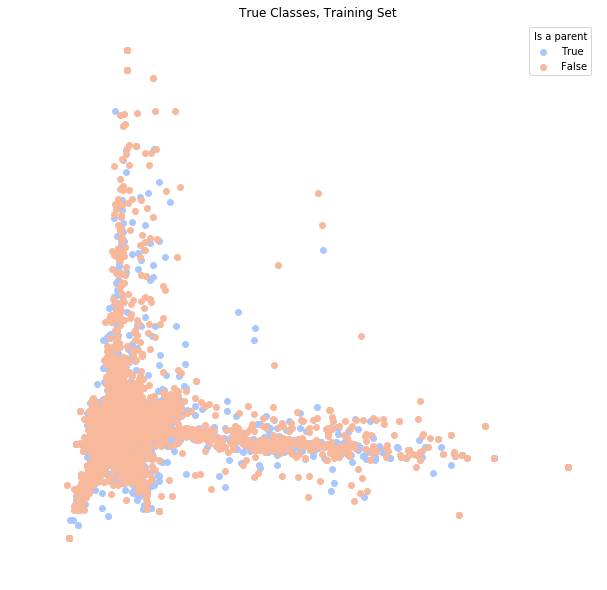

In [49]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot for being a parent
a = np.stack(train_df[train_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot for not being a parent
a = np.stack(train_df[train_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is a parent')
plt.title('True Classes, Training Set')
plt.show()

To determine how many k components we want to use, we have to check how much of the explained variance this first k components are capturing. We can see that k=100 is a reasonable measure, and adding more than that would be overfitting our model with not much gain from it.

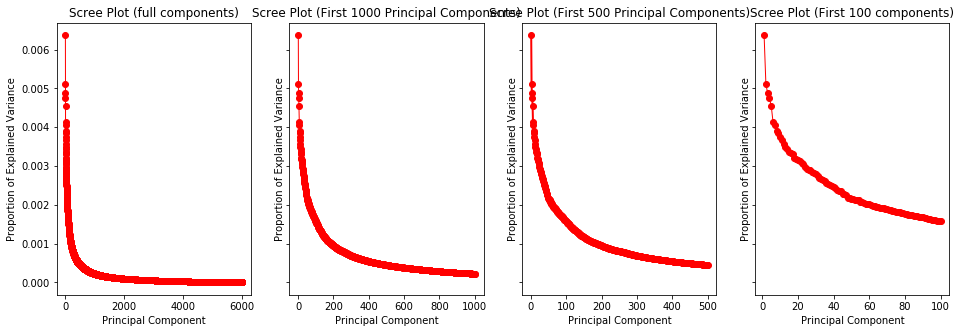

In [52]:
n = len(train_df)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (16, 5), sharey=True)
#Here i modify the range so it is not based on the length of columns but the length of rows, since the eigen vals will
#be equal to p columns if n>p.


eigen_vals = np.arange(6004) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (full components)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(1000) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:1000], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 1000 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(500) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:500], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 500 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(100) + 1
ax4.plot(eigen_vals, pca.explained_variance_ratio_[:100], 'ro-', linewidth=1)
ax4.set_title('Scree Plot (First 100 components)')
ax4.set_xlabel('Principal Component')
ax4.set_ylabel('Proportion of Explained Variance')

plt.show()

We see that the accuracy with the logistic regression is 68.8%. It's still a little low. 

In [53]:
train_df['pca_reduced_100'] = train_df['pca'].apply(lambda x: x[:100])

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_df['pca_reduced_100'], axis=0), train_df['category'])

print(logistic.score(np.stack(train_df['pca_reduced_100'], axis=0), train_df['category']))



0.6888598781549173


In [54]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_df['cleaned_hm'])
test_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_df['vect'], axis=0))
test_df['pca'] = [r for r in reduced_data_test]
test_df['pca_reduced_100'] = test_df['pca'].apply(lambda x: x[:100])

#Test
logistic.score(np.stack(test_df['pca_reduced_100'], axis=0), test_df['category'])

0.6898781397662274

In [55]:
print("Training:")
print(logistic.score(np.stack(train_df['pca_reduced_100'], axis=0), train_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_df['pca_reduced_100'], axis=0), test_df['category']))

Training:
0.6888598781549173
Testing:
0.6898781397662274


We see no much difference between choosing 100 components from choosing 200 components!

In [56]:
train_df['pca_reduced_200'] = train_df['pca'].apply(lambda x: x[:200])
test_df['pca_reduced_200'] = test_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_df['pca_reduced_200'], axis=0), train_df['category'])

print("Training:")
print(logistic.score(np.stack(train_df['pca_reduced_200'], axis=0), train_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_df['pca_reduced_200'], axis=0), test_df['category']))

Training:
0.6981847569314932
Testing:
0.6953494155682666


Making the calculations with the logistic regression classifier, we see that we have more in-sample accuracy. 

## 2.1 Logistic Regression
We now take a look at the logistic regression results. Nevertheless, the previous section can be interpreted as PCA results. Our classifier is beter at predicting true negatives but bad at predicting true positives(many predicted as true were actually false). The ROC curve doesn't look that great either.

In [57]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_df['vect'], axis=0), train_df['category'])
print(logistic_l1.score(np.stack(train_df['vect'], axis=0), train_df['category']))

0.7605371130175308


In [60]:
print(logistic_l1.score(np.stack(test_df['vect'], axis=0), test_df['category']))
test_df['lr_predict'] = logistic_l1.predict(np.stack(test_df['vect'], axis=0))
print("precision with LR:")
print(sklearn.metrics.precision_score(test_df['category'],test_df['lr_predict']))
print("recall with LR:")
sklearn.metrics.recall_score(test_df['category'],test_df['lr_predict'])
print("F1 with LR:")
print(sklearn.metrics.f1_score(test_df['category'],test_df['lr_predict']))

0.7033076349166874
precision with LR:
0.7239336492890995
recall with LR:
F1 with LR:
0.5060041407867495


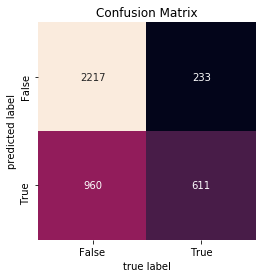

In [61]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_df)

In [ ]:
lucem_illud_2020.plotMultiROC(logistic_l1, test_df)

## 2.2. Naive Bayes classifier
We now train a Naive Bayes classifier for the task. It doesn't seem to perform great either. Precision and recall is low when performing our classification in the testing set. 

In [62]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [63]:
print("Training:")
print(naiveBayes.score(np.stack(train_df['vect'], axis=0), train_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_df['vect'], axis=0), test_df['category']))
test_df['nb_predict'] = naiveBayes.predict(np.stack(test_df['vect'], axis=0))
test_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_df['vect'], axis=0))[:,0]

Training:
0.7662563720004973
Testing:
0.6883859736383984


In [ ]:
lucem_illud_2020.evaluateClassifier(naiveBayes, test_df)

In [64]:
print("precision with NB:")
print(sklearn.metrics.precision_score(test_df['category'],test_df['nb_predict']))
print("recall with NB:")
print(sklearn.metrics.recall_score(test_df['category'],test_df['nb_predict']))
print("F1 with NB:")
print(sklearn.metrics.f1_score(test_df['category'],test_df['nb_predict']))

precision with NB:
0.6537717601547389
recall with NB:
0.43029917250159133
F1 with NB:
0.5190019193857965


The achieved precision and recall with NB is not great. This might be because the text that describes each label is small compared to a speech o a bigger corpus. 

## 3.1. Decision Trees
The decision tree classifier is one of the best, according to the results that we obtain from our testing data. Precision is high (.91) for the true label, nevertheless, the error rate is high. 

In [65]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_df['vect'], axis =0), train_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

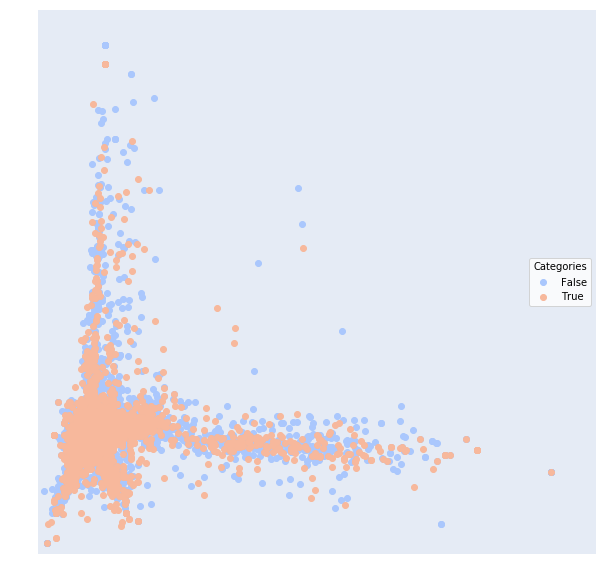

In [66]:
lucem_illud_2020.plotregions(clf_tree, train_df)

In [67]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.315678,0.601208,0.661047,0.660329,0.986500
True,0.315678,0.601208,0.911647,0.504312,0.215916


In [68]:
sklearn.metrics.accuracy_score(test_df['category'],clf_tree.predict(np.stack(test_df['vect'], axis = 0)))

0.6824173091270828

The following graph indicates that we may benefit from adding dephts to the tree, but this increase is actually not that high:It gets stucked at around 0.69 

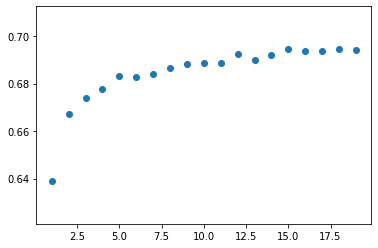

In [88]:
# depthvec = []
# scorevec = []
# for i in range(1,20):
#     tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
#     tree2.fit(np.stack(train_df['vect'], axis =0), train_df['category'])
#     score = sklearn.metrics.accuracy_score(test_df['category'], tree2.predict(np.stack(test_df['vect'], axis = 0)))
#     depthvec.append(i)
#     scorevec.append(score)
# plt.scatter(depthvec,scorevec)
# plt.show()

### 3.2. Bagging with Random Forests
The bagging method with random forests seem to be a better classifier than just decision trees. The error rate is slightly less than with the decision trees, but the AUC (area under the roc curve) is a little better. It all depends on what are our needs with the model, so we can choose the best one that fits our purpose.

In [83]:
forest = sklearn.ensemble.RandomForestClassifier() #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(forest, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data


In [84]:
bag.fit(np.stack(train_df['vect'], axis =0), train_df['category']) 

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

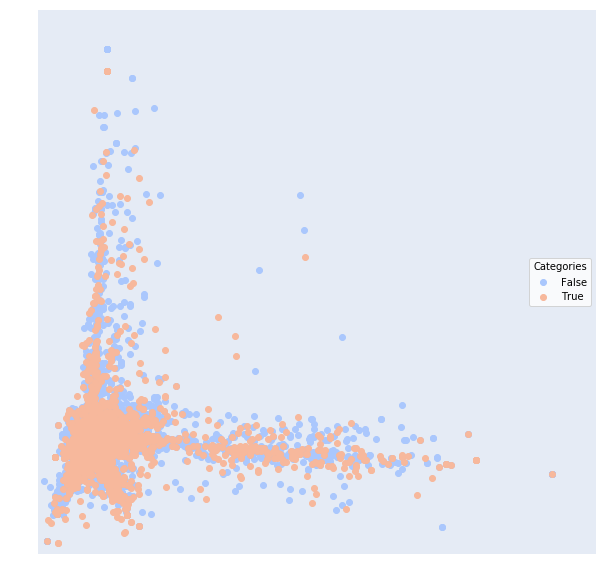

In [85]:
lucem_illud_2020.plotregions(bag, train_df)

In [86]:
lucem_illud_2020.evaluateClassifier(bag, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.294454,0.649547,0.699559,0.691049,0.905714
True,0.294454,0.649547,0.727915,0.523353,0.393380


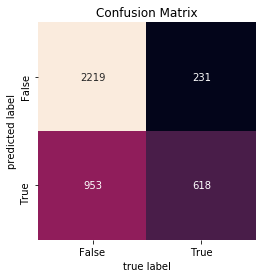

In [87]:
lucem_illud_2020.plotConfusionMatrix(bag, test_df)

## Exercise 4. K Nearest Neighbors

We now perform a K nearest neighbors classification task, with just 7 neighbors. The AUC is better than with decision trees. Recall is good but for detecting the false label (or not being a parent). 
The error rate is among the classifiers who behave regularly with this dataset. The confusion matrix in the non-diagonal spots have too many cases, sugesting that this classifier is not that good, nevertheless, it is way better predicting true non parents (2006) than true parents (366)

In [74]:
n_neighbors = 7
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [75]:
clf_knearest.fit(np.stack(train_df['vect'], axis = 0), train_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [76]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.305545,0.638066,0.691051,0.682687,0.899468
True,0.305545,0.638066,0.707353,0.510871,0.376665


In [77]:
#Add to df
test_df['knn_predict'] = clf_knearest.predict(np.stack(test_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_df['vect'], axis=0), test_df['category']))

Testing score:
0.5899030092016911


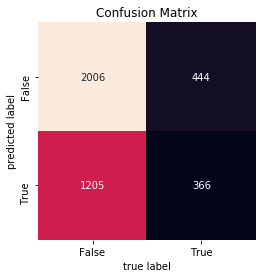

In [78]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_df)

##  Exercise 5 : Neural Networks
Neural networks behave better than the decision tree, for example, but not better than random forests with baggin. Again, in general terms, the model is better at predictin non parents than predicting parents. One limitation about the description of happy moments was the lack of big prhases to describe them, so the number of words per case was not heavy. This can cause an inconvenience as we have limited sample to train our classifier. 

In [79]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Evaluating the results

In [80]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.365083,0.614654,0.697665,0.671805,0.707347
True,0.365083,0.614654,0.533507,0.465239,0.521961


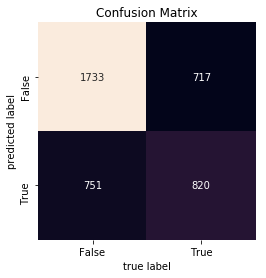

In [81]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_df)

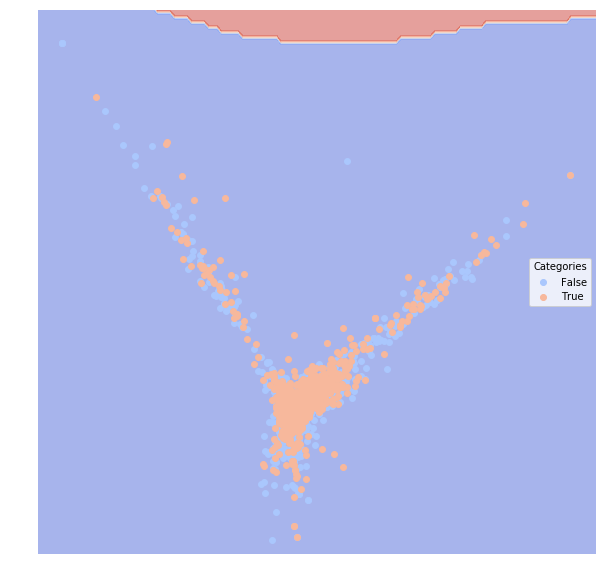

In [82]:
lucem_illud_2020.plotregions(clf_nn, test_df)